# Data Visualization: An Epidemic Turned into a Pandemic!

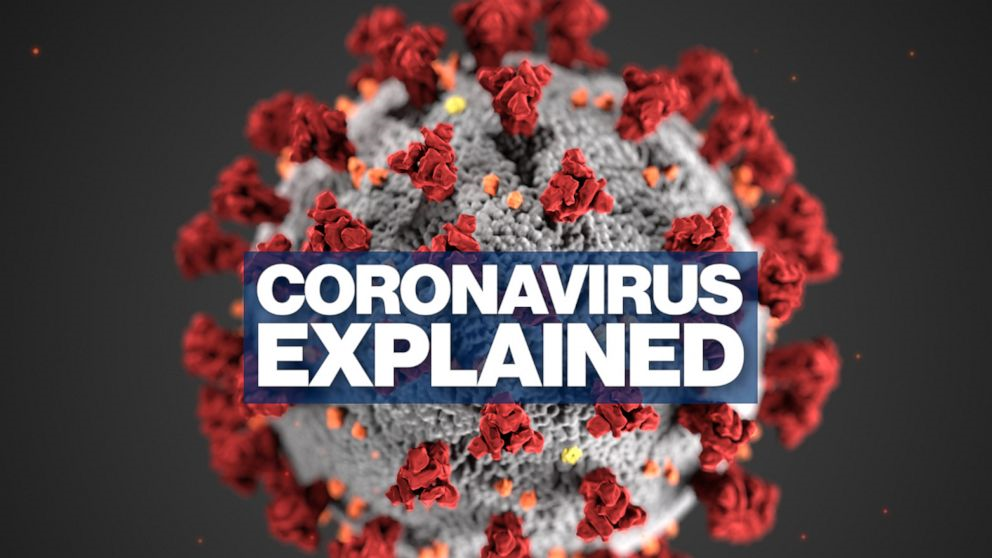

# Background

COVID-19 broke out for the first time in Wuhan, China in December 2019. WHO declared the COVID-19 outbreak to be a pandemic on 11th March, 2020. It was beyond imagination how quickly the virus spread across the globe despite preventive measures like shutdowns and quarantines all around the world.

# Data Source

The Johns Hopkins University Center for Systems Science and Engineering created publicly available data consolidated from sources like the WHO, the Centers for Disease Control and Prevention (CDC), and the Ministry of Health from multiple countries- https://github.com/RamiKrispin/coronavirus

# Objective

Visualizing COVID-19 data of the initial weeks of the outbreak to see at what point this virus became a global pandemic and insights into the affected countries during that tenure.

In [2]:
# Load the readr, ggplot2, and dplyr packages
library(readr)
library(ggplot2)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# Analysis

The table below shows some of the cumulative confirmed cases of COVID-19 worldwide by date.

In [3]:
# Read datasets of confirmed_cases_worldwide
confirmed_cases_worldwide <- read_csv("confirmed_cases_worldwide.csv")

# See contents of the data
head(confirmed_cases_worldwide)

Parsed with column specification:
cols(
  date = col_date(format = ""),
  cum_cases = col_double()
)


date,cum_cases
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927


In order to make better sense of the data, let us visualize its results as seen below.

# Cumulative world-wide cases (Datewise)

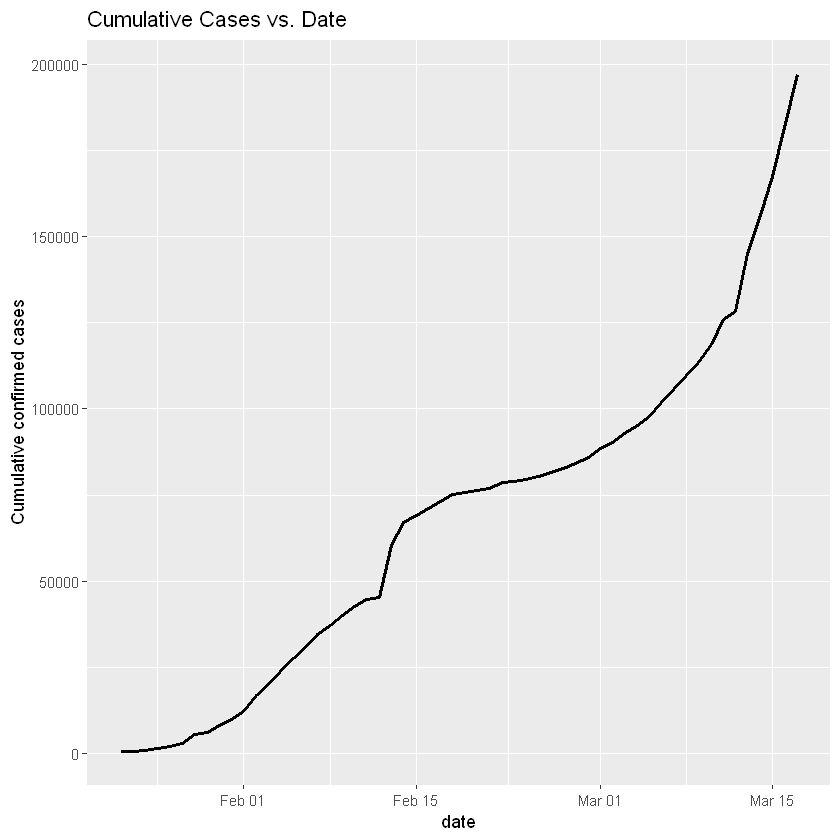

In [46]:
p= ggplot(confirmed_cases_worldwide, aes(date, cum_cases))+ 
  geom_line(size=1)
p + labs(y="Cumulative confirmed cases", title="Cumulative Cases vs. Date")

The plot displays the global rise in total number of confirmed cases rapidly approaching to around 200,000. However, there is an odd jump in mid February, then the rate of new cases slows down for a while, and again speeds up again in March. Let’s dive deeper to see what is happening!

It is known that early on in the outbreak, the cases were centered only in China. Let us now plot confirmed COVID-19 cases in China and the rest of the world separately to make comparisons.

The data used to visualize the comparison is as seen in the table below: 

In [4]:
# Read confirmed in cases China vs the world
confirmed_cases_china_vs_world <- read_csv("confirmed_cases_china_vs_world.csv")

# See the contents of the data
head(confirmed_cases_china_vs_world)

Parsed with column specification:
cols(
  is_china = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)


is_china,date,cases,cum_cases
China,2020-01-22,548,548
China,2020-01-23,95,643
China,2020-01-24,277,920
China,2020-01-25,486,1406
China,2020-01-26,669,2075
China,2020-01-27,802,2877


# Cumulative Covid Cases: China Vs Not China

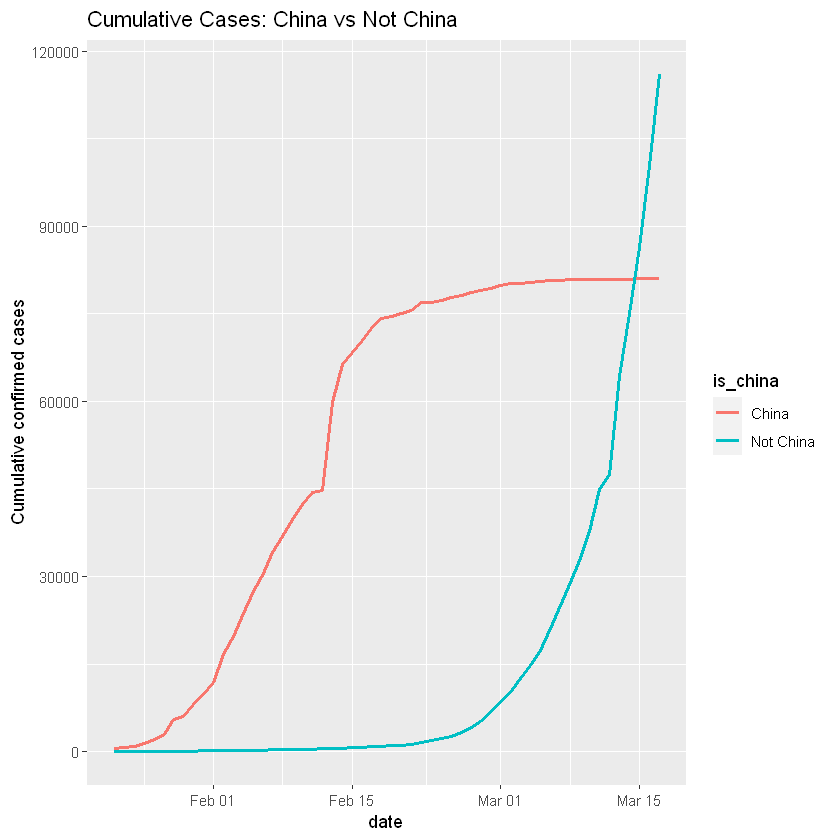

In [50]:
#A line plot of cumulative cases vs. date, grouped and colored by cases in China
p= plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date, cum_cases, group = is_china, color = is_china), size=1) +
  ylab("Cumulative confirmed cases")
p + labs(title="Cumulative Cases: China vs Not China")

On plotting results for China vs Not China, clearly, the two lines show different trends. Majority of the cases were observed in China in February. This changed in March when the world saw an outbreak, wherein the total number of cases outside China overshot the number of cases in China.

Studies hinted that there were a couple of landmark events that happened during the outbreak. The key one revealed a huge jump in the China line on February 13, 2020. This wasn’t just a bad day regarding the outbreak. It was discovered that China changed the way it reported figures on that day.

Let us now annotate events like these to better interpret changes as can be seen in the following plot.

# Annotating significant events!

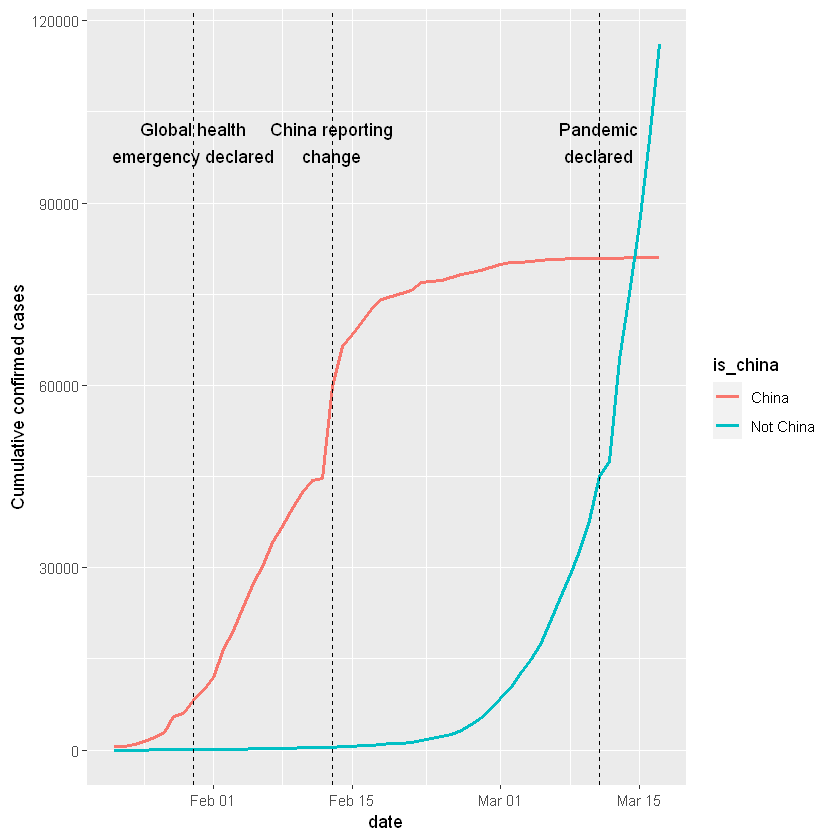

In [51]:
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))
plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed") +
  geom_text(aes(date, label = event), data = who_events, y = 1e5)

Next, when trying to assess how big and grave the future problems are going to be, it is important to be able to measure the rapid increase in number of cases. A good starting point is to check if the cases are growing faster or slower than in a linear manner.

Further, there is a clear surge of cases observed around February 13, 2020, with the reporting change in China. However, a couple of days after that, the growth of cases in China appears to have slowed down.

Let us now describe COVID-19’s growth in China after February 15, 2020.

# Cumulative Cases in China post Feb 15, 2020

`geom_smooth()` using formula 'y ~ x'


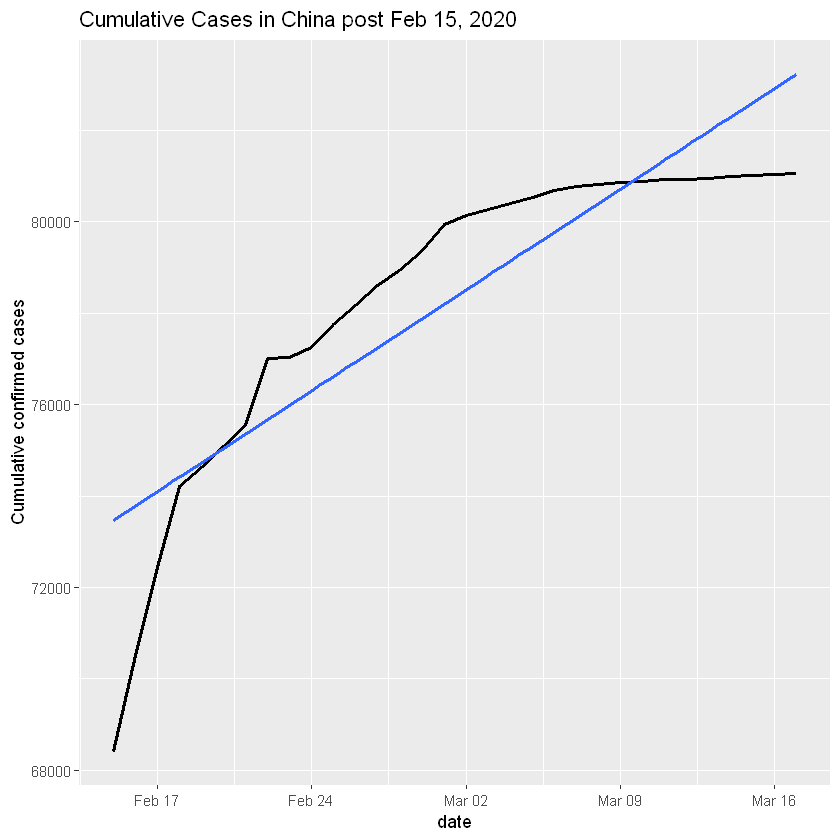

In [52]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
   filter(is_china == "China",date >= "2020-02-15")
# Aline plot cum_cases vs. date
# Add a smooth trend line using linear regression
p= ggplot(china_after_feb15, aes(date, cum_cases)) +
   geom_line(size=1)+
  geom_smooth(se = FALSE, method = lm)+
  ylab("Cumulative confirmed cases")
p+ labs(title="Cumulative Cases in China post Feb 15, 2020")

The plot above indicates that the growth rate in China is slower than linear. This means that the virus was somewhat contained in China between late February and early March.

Let’s find out the status of the rest of the world as compared to this linear growth!

# Comparsion: Status of the rest of the world to the linear trend

`geom_smooth()` using formula 'y ~ x'


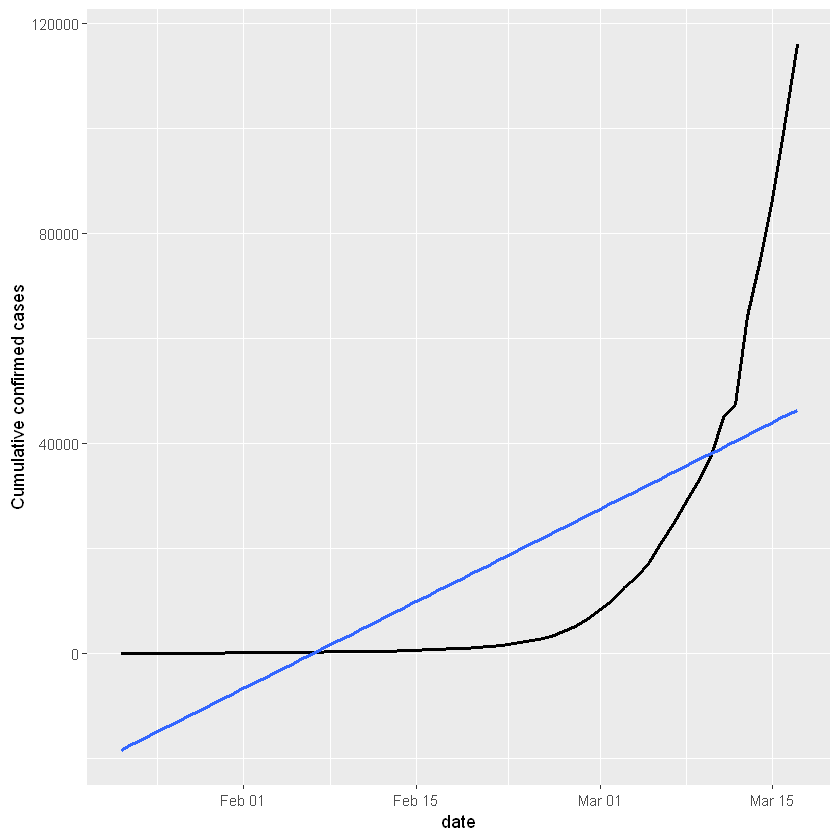

In [53]:
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
filter(is_china != "China")
# Using not_china, draw a line plot cum_cases vs. date
# Add a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <- ggplot(not_china, aes(date, cum_cases)) +
   geom_line(size=1)+
  geom_smooth(se = FALSE, method = lm)+
  ylab("Cumulative confirmed cases")

# See the result
plt_not_china_trend_lin

From the plot above, a straight line is not a good fit and it shows that the cases in other parts of the world are growing much faster than linearly.

To achieve a better fit, let us log transform the y-axis and see the results.

`geom_smooth()` using formula 'y ~ x'


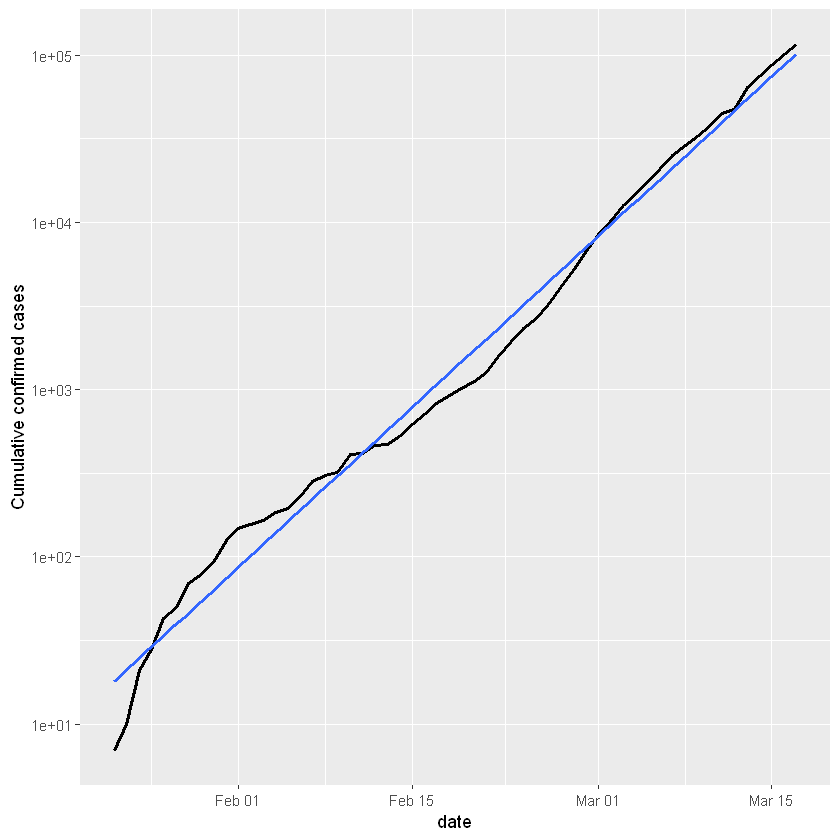

In [54]:
# Modify the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + scale_y_log10()

The logarithmic scale certainly fits the data well. There are two interesting inferences from this:

1.The upside is that a good fit is great news in terms of data science.
2.The downside is that from a public health point of view, this concludes that cases of COVID-19 in the rest of the world are growing at an exponential rate; which is terrible news!

COVID-19 does not affect all the countries equally. Hence, looking for significantly affected countries would be helpful. Owing to that, let us now find the countries other than China that suffer with the most confirmed cases.

The top 7 countries other than China having COVID-19 can be see in the table below:

In [5]:
# Run this to get the data for each country
confirmed_cases_by_country <- read_csv("confirmed_cases_by_country.csv")

# Group by country, summarize to calculate total cases, and display the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarise(total_cases= max(cum_cases))%>%
  top_n(7)

# See the result- Top 7
top_countries_by_total_cases

Parsed with column specification:
cols(
  country = col_character(),
  province = col_character(),
  date = col_date(format = ""),
  cases = col_double(),
  cum_cases = col_double()
)
`summarise()` ungrouping output (override with `.groups` argument)
Selecting by total_cases


country,total_cases
France,7699
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748
US,6421


The results show that even though the outbreak was first seen in China, among the many countries in Asia, only South Korea is in the top 7 affected countries with confirmed cases; others being France, Italy, Spain and Germany which share borders.

To get more context, we can plot these countries’ confirmed cases over time as seen in the below:

# Cumulative Confirmed Covid Cases of Top 7 Countries

Parsed with column specification:
cols(
  country = col_character(),
  date = col_date(format = ""),
  cum_cases = col_double()
)


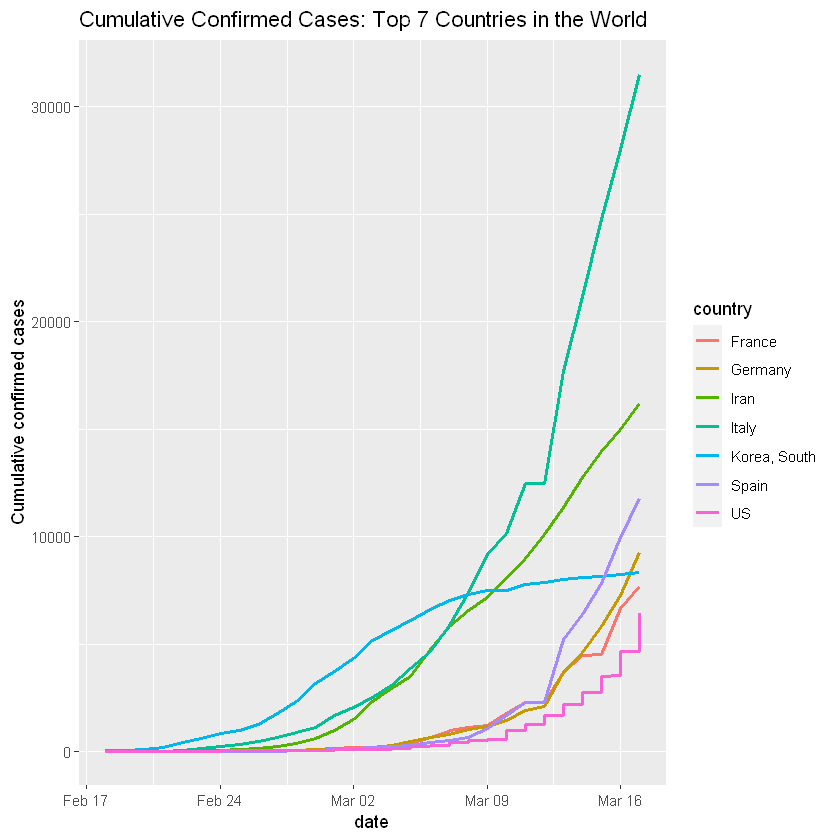

In [6]:
# Run this to get the data for the top 7 countries
confirmed_cases_top7_outside_china= read_csv("confirmed_cases_top7_outside_china.csv")

# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, grouped and colored by country
p= ggplot(confirmed_cases_top7_outside_china, aes(date, cum_cases,colour=country)) +
   geom_line(aes(group = country), size=1)+
  ylab("Cumulative confirmed cases")
p+ labs(title="Cumulative Confirmed Cases: Top 7 Countries in the World")